In [1]:
import ee
import pandas as pd
from shapely.geometry import Point, shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Tennessee counties impacted by Hurricane Helene
county_names = [
    "Carter", "Cocke", "Greene", "Hamblen", "Hawkins",
    "Johnson", "Sevier", "Unicoi", "Washington", "Claiborne",
    "Grainger", "Sullivan"
]

# Load Tennessee counties and filter by state FIPS '47'
counties = ee.FeatureCollection('TIGER/2016/Counties') \
    .filter(ee.Filter.eq('STATEFP', '47')) \
    .filter(ee.Filter.inList('NAME', county_names))

geometry = counties.geometry()

# Create convex hull of the selected counties
hull_polygon = shape(geometry.convexHull().getInfo())

years = range(2024, 2014, -1)
all_data = []

for year in years:
    print(f"Processing {year}...")
    smap = ee.ImageCollection('NASA/SMAP/SPL4SMGP/007') \
        .filterDate(f'{year}-09-18', f'{year}-9-25') \
        .filterBounds(geometry) \
        .select('sm_rootzone')

    if smap.size().getInfo() == 0:
        print(f"No data for {year}")
        continue

    image = smap.mean().clip(geometry)
    samples = image.sample(region=geometry, scale=10000, numPixels=5000, geometries=True)
    features = samples.getInfo()['features']

    year_data = []
    for f in features:
        lon, lat = f['geometry']['coordinates']
        if hull_polygon.contains(Point(lon, lat)):
            year_data.append({
                'year': year,
                'latitude': lat,
                'longitude': lon,
                'sm_rootzone': f['properties'].get('sm_rootzone')
            })

    if year_data:
        all_data.extend(year_data)
        print(f"Collected {len(year_data)} points for {year}")

# Save data to CSV
if all_data:
    df = pd.DataFrame(all_data).sort_values('year')
    df.to_csv("smap_soil_moisture_rootzone_tn_2015_2024_before.csv", index=False)
    print("Saved to smap_soil_moisture_rootzone_tn_2015_2024_before.csv")
else:
    print("No data collected.")

Processing 2024...
Collected 147 points for 2024
Processing 2023...
Collected 147 points for 2023
Processing 2022...
Collected 147 points for 2022
Processing 2021...
Collected 147 points for 2021
Processing 2020...
Collected 147 points for 2020
Processing 2019...
Collected 147 points for 2019
Processing 2018...
Collected 147 points for 2018
Processing 2017...
Collected 147 points for 2017
Processing 2016...
Collected 147 points for 2016
Processing 2015...
Collected 147 points for 2015
Saved to smap_soil_moisture_rootzone_tn_2015_2024_before.csv


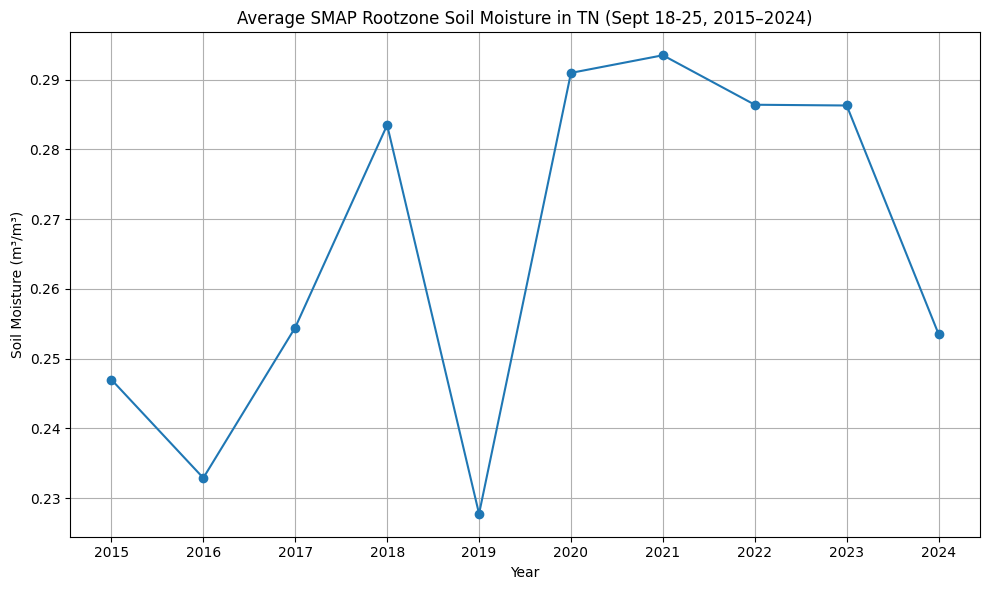

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df = pd.read_csv('smap_soil_moisture_rootzone_tn_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg = df.groupby('year')['sm_rootzone'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sm_rootzone'], marker='o', linestyle='-')
plt.title('Average SMAP Rootzone Soil Moisture in TN (Sept 18-25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid(True)
plt.xticks(yearly_avg['year'])  # Ensure all years show on the x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

In [3]:
import ee
import pandas as pd
from shapely.geometry import Point, shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Tennessee counties impacted by Hurricane Helene
county_names = [
    "Carter", "Cocke", "Greene", "Hamblen", "Hawkins",
    "Johnson", "Sevier", "Unicoi", "Washington", "Claiborne",
    "Grainger", "Sullivan"
]

# Load Tennessee counties and filter by state FIPS '47'
counties = ee.FeatureCollection('TIGER/2016/Counties') \
    .filter(ee.Filter.eq('STATEFP', '47')) \
    .filter(ee.Filter.inList('NAME', county_names))

geometry = counties.geometry()

# Create convex hull of the selected counties
hull_polygon = shape(geometry.convexHull().getInfo())

years = range(2024, 2014, -1)
all_data = []

for year in years:
    print(f"Processing {year}...")
    smap = ee.ImageCollection('NASA/SMAP/SPL4SMGP/007') \
        .filterDate(f'{year}-09-18', f'{year}-9-25') \
        .filterBounds(geometry) \
        .select('sm_surface')

    if smap.size().getInfo() == 0:
        print(f"No data for {year}")
        continue

    image = smap.mean().clip(geometry)
    samples = image.sample(region=geometry, scale=10000, numPixels=5000, geometries=True)
    features = samples.getInfo()['features']

    year_data = []
    for f in features:
        lon, lat = f['geometry']['coordinates']
        if hull_polygon.contains(Point(lon, lat)):
            year_data.append({
                'year': year,
                'latitude': lat,
                'longitude': lon,
                'sm_surface': f['properties'].get('sm_surface')
            })

    if year_data:
        all_data.extend(year_data)
        print(f"Collected {len(year_data)} points for {year}")

# Save data to CSV
if all_data:
    df = pd.DataFrame(all_data).sort_values('year')
    df.to_csv("smap_soil_moisture_surface_tn_2015_2024_before.csv", index=False)
    print("Saved to smap_soil_moisture_surface_tn_2015_2024_before.csv")
else:
    print("No data collected.")

Processing 2024...
Collected 147 points for 2024
Processing 2023...
Collected 147 points for 2023
Processing 2022...
Collected 147 points for 2022
Processing 2021...
Collected 147 points for 2021
Processing 2020...
Collected 147 points for 2020
Processing 2019...
Collected 147 points for 2019
Processing 2018...
Collected 147 points for 2018
Processing 2017...
Collected 147 points for 2017
Processing 2016...
Collected 147 points for 2016
Processing 2015...
Collected 147 points for 2015
Saved to smap_soil_moisture_surface_tn_2015_2024_before.csv


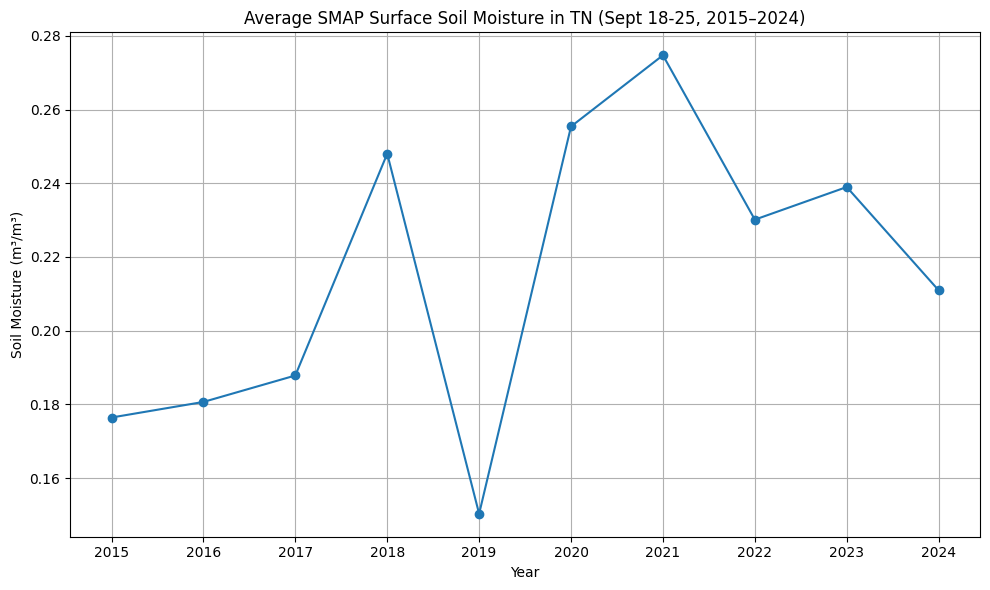

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df = pd.read_csv('smap_soil_moisture_surface_tn_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg = df.groupby('year')['sm_surface'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sm_surface'], marker='o', linestyle='-')
plt.title('Average SMAP Surface Soil Moisture in TN (Sept 18-25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid(True)
plt.xticks(yearly_avg['year'])  # Ensure all years show on the x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

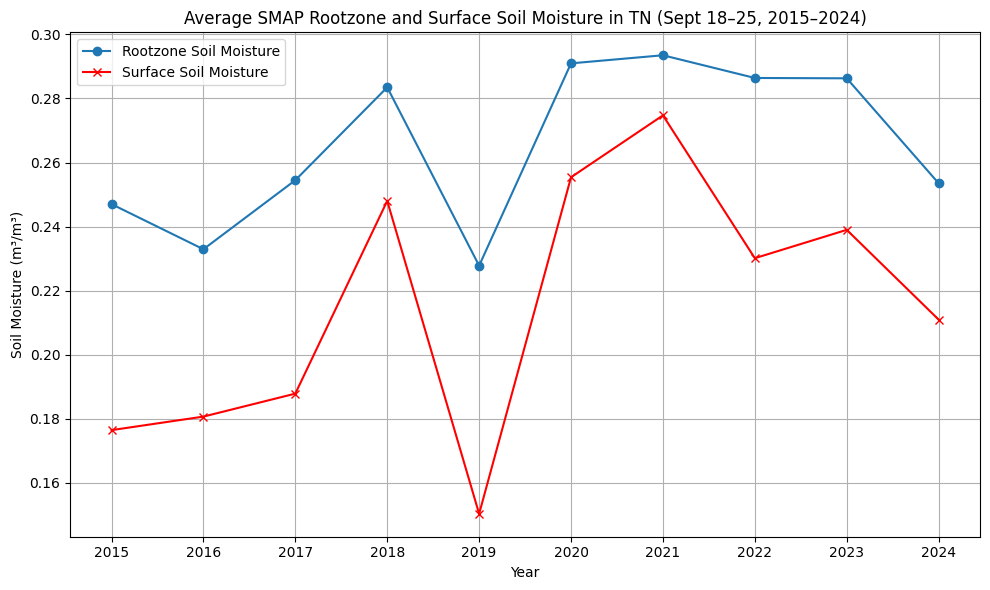

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df1 = pd.read_csv('smap_soil_moisture_rootzone_tn_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg1 = df1.groupby('year')['sm_rootzone'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Rootzone plot
plt.plot(
    yearly_avg1['year'],
    yearly_avg1['sm_rootzone'],
    marker='o',
    linestyle='-',
    label='Rootzone Soil Moisture'
)

# Surface plot (assuming 'yearly_avg' and 'sm_surface' are already defined elsewhere)
plt.plot(
    yearly_avg['year'],
    yearly_avg['sm_surface'],
    marker='x',
    linestyle='-',
    color='r',
    label='Surface Soil Moisture'
)

# Add title and labels
plt.title('Average SMAP Rootzone and Surface Soil Moisture in TN (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.legend()  # Now the legend will show the two lines
plt.grid(True)
plt.xticks(yearly_avg1['year'])  # Show each year on x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

In [7]:
import pandas as pd
from scipy import stats

# Load both datasets
df_root = pd.read_csv("smap_soil_moisture_rootzone_tn_2015_2024_before.csv")
df_surface = pd.read_csv("smap_soil_moisture_surface_tn_2015_2024_before.csv")

# Compute yearly means
root_yearly = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
surface_yearly = df_surface.groupby('year')['sm_surface'].mean().reset_index()

# --- Rootzone Analysis ---
past_root = root_yearly[root_yearly['year'] < 2024]
val_root_2024 = root_yearly[root_yearly['year'] == 2024]['sm_rootzone'].values[0]
mean_root_10yr = past_root['sm_rootzone'].mean()
t_root, p_root = stats.ttest_1samp(past_root['sm_rootzone'], val_root_2024)

# --- Surface Analysis ---
past_surface = surface_yearly[surface_yearly['year'] < 2024]
val_surface_2024 = surface_yearly[surface_yearly['year'] == 2024]['sm_surface'].values[0]
mean_surface_10yr = past_surface['sm_surface'].mean()
t_surface, p_surface = stats.ttest_1samp(past_surface['sm_surface'], val_surface_2024)

# --- Results ---
print("🟫 ROOTZONE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_root_10yr:.4f}")
print(f"2024 Avg: {val_root_2024:.4f}")
print(f"T-statistic: {t_root:.3f}, P-value: {p_root:.4f}")
if p_root < 0.05 and val_root_2024 < mean_root_10yr:
    print("✅ 2024 is significantly lower (p < 0.05).")
else:
    print("❌ 2024 is NOT significantly lower.")

print("\n🟥 SURFACE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_surface_10yr:.4f}")
print(f"2024 Avg: {val_surface_2024:.4f}")
print(f"T-statistic: {t_surface:.3f}, P-value: {p_surface:.4f}")
if p_surface < 0.05 and val_surface_2024 < mean_surface_10yr:
    print("✅ 2024 is significantly lower (p < 0.05).")
else:
    print("❌ 2024 is NOT significantly lower.")

🟫 ROOTZONE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2670
2024 Avg: 0.2535
T-statistic: 1.533, P-value: 0.1638
❌ 2024 is NOT significantly lower.

🟥 SURFACE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2158
2024 Avg: 0.2109
T-statistic: 0.342, P-value: 0.7412
❌ 2024 is NOT significantly lower.


In [4]:
# --- Given data ---
mean_root_10yr = 0.2670
val_root_2024 = 0.2535

mean_surface_10yr = 0.2158
val_surface_2024 = 0.2109

# --- Percent decrease calculations ---
percent_diff_root = ((mean_root_10yr - val_root_2024) / mean_root_10yr) * 100
percent_diff_surface = ((mean_surface_10yr - val_surface_2024) / mean_surface_10yr) * 100

# --- Print results ---
print("📉 Percent Decrease in Soil Moisture (2024 vs. 10-Year Avg)\n")

print("🟫 ROOTZONE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_root_10yr:.4f}")
print(f"2024 Avg: {val_root_2024:.4f}")
print(f"Percent Decrease: {percent_diff_root:.2f}%\n")

print("🟥 SURFACE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_surface_10yr:.4f}")
print(f"2024 Avg: {val_surface_2024:.4f}")
print(f"Percent Decrease: {percent_diff_surface:.2f}%")


📉 Percent Decrease in Soil Moisture (2024 vs. 10-Year Avg)

🟫 ROOTZONE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2670
2024 Avg: 0.2535
Percent Decrease: 5.06%

🟥 SURFACE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2158
2024 Avg: 0.2109
Percent Decrease: 2.27%


/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_38202/1556699796.py:65: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_38202/1556699796.py:66: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('soil_moisture_trend_updated.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


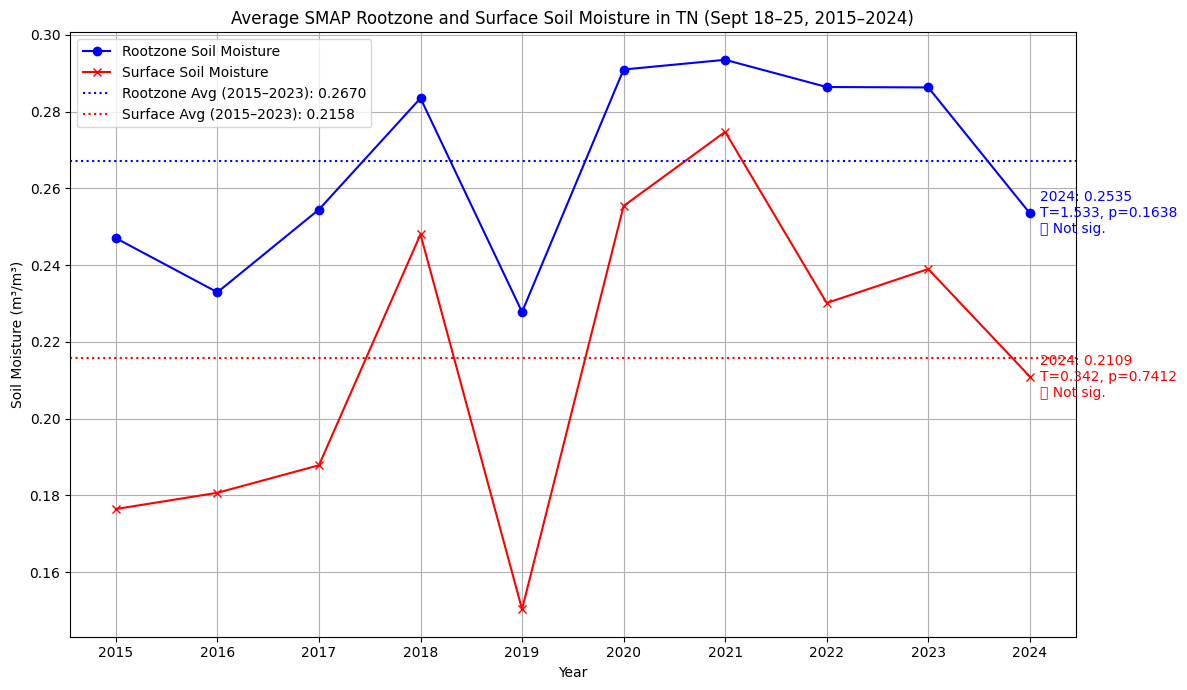

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load rootzone and surface CSVs
df_root = pd.read_csv('smap_soil_moisture_rootzone_tn_2015_2024_before.csv')
df_surf = pd.read_csv('smap_soil_moisture_surface_tn_2015_2024_before.csv')

# Group by year and calculate mean soil moisture
yearly_avg_root = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
yearly_avg_surf = df_surf.groupby('year')['sm_surface'].mean().reset_index()

# Updated averages and statistical test results (new set)
rootzone_avg_2015_2023 = 0.2670
rootzone_2024 = 0.2535
rootzone_t = 1.533
rootzone_p = 0.1638

surface_avg_2015_2023 = 0.2158
surface_2024 = 0.2109
surface_t = 0.342
surface_p = 0.7412

# Plotting
plt.figure(figsize=(12, 7))

# Plot annual soil moisture lines
plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'],
    marker='o', linestyle='-', color = 'blue', label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'],
    marker='x', linestyle='-', color='red', label='Surface Soil Moisture'
)

# Horizontal 10-year average lines
plt.axhline(
    y=rootzone_avg_2015_2023, color='blue', linestyle=':',
    label='Rootzone Avg (2015–2023): 0.2670'
)
plt.axhline(
    y=surface_avg_2015_2023, color='red', linestyle=':',
    label='Surface Avg (2015–2023): 0.2158'
)

# Annotations for 2024
plt.text(
    2024.1, rootzone_2024,
    f"2024: {rootzone_2024}\nT={rootzone_t}, p={rootzone_p}\n❌ Not sig.",
    color='blue', va='center'
)
plt.text(
    2024.1, surface_2024,
    f"2024: {surface_2024}\nT={surface_t}, p={surface_p}\n❌ Not sig.",
    color='red', va='center'
)

# Final plot formatting
plt.title('Average SMAP Rootzone and Surface Soil Moisture in TN (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.xticks(yearly_avg_root['year'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('soil_moisture_trend_updated.png')
plt.show()


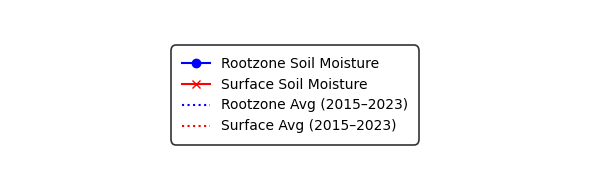

In [3]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Create dummy line objects for the legend
rootzone_line = mlines.Line2D([], [], color='blue', linestyle='-', marker='o', label='Rootzone Soil Moisture')
surface_line = mlines.Line2D([], [], color='red', linestyle='-', marker='x', label='Surface Soil Moisture')
rootzone_avg_line = mlines.Line2D([], [], color='blue', linestyle=':', label='Rootzone Avg (2015–2023)')
surface_avg_line = mlines.Line2D([], [], color='red', linestyle=':', label='Surface Avg (2015–2023)')

# Set up figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes

# Add legend with frame (border)
legend = ax.legend(
    handles=[rootzone_line, surface_line, rootzone_avg_line, surface_avg_line],
    loc='center', frameon=True, edgecolor='black', fontsize=10
)

# Optional: adjust legend frame linewidth and padding
legend.get_frame().set_linewidth(1.2)
legend.get_frame().set_boxstyle('round,pad=0.4')

# Save or show
plt.tight_layout()
plt.savefig('soil_moisture_legend_with_border.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()


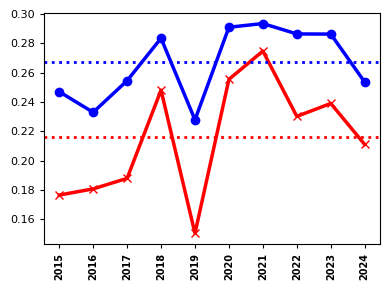

In [10]:
# ... (same code as before above plotting) ...

plt.figure(figsize=(4, 3))  # smaller figure

plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'],
    marker='o', markersize=6, linewidth=2.5, linestyle='-', color='blue',
    label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'],
    marker='x', markersize=6, linewidth=2.5, linestyle='-', color='red',
    label='Surface Soil Moisture'
)

plt.axhline(
    y=rootzone_avg_2015_2023, color='blue', linestyle=':', linewidth=2,
    label='Rootzone Avg (2015–2023): 0.2670'
)
plt.axhline(
    y=surface_avg_2015_2023, color='red', linestyle=':', linewidth=2,
    label='Surface Avg (2015–2023): 0.2158'
)




# Show all years with rotated labels at 90° for maximum clarity
years = yearly_avg_root['year']
plt.xticks(
    ticks=years,
    labels=years.astype(str),
    fontsize=7,
    rotation=90,
    ha='center',
    fontweight='bold',
    color='black'
)

plt.yticks(fontsize=8)
plt.tick_params(length=3)

plt.grid(False)
plt.tight_layout()

plt.savefig('soil_moisture_trend_compact.png', dpi=300)
plt.show()


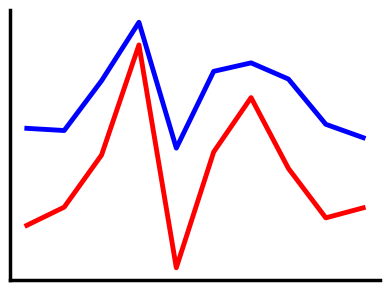

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
df_root = pd.read_csv('smap_soil_moisture_rootzone_ky_2015_2024_before.csv')
df_surf = pd.read_csv('smap_soil_moisture_surface_ky_2015_2024_before.csv')

# Group by year
yearly_avg_root = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
yearly_avg_surf = df_surf.groupby('year')['sm_surface'].mean().reset_index()

# Create figure
plt.figure(figsize=(4, 3))  # Smaller figure for icon-style

# Plot soil moisture lines with thicker width
plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'], markersize=8, linewidth=3.5, linestyle='-', color='blue',
    label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'], markersize=8, linewidth=3.5, linestyle='-', color='red',
    label='Surface Soil Moisture'
)

# Remove ticks and labels
plt.xticks([], [])
plt.yticks([], [])

# Show only bottom and left axes, and make them thicker
ax = plt.gca()
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

plt.grid(False)
plt.tight_layout()

plt.savefig('soil_moisture_trend_thicklines_icon.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
